In [12]:
!pip3 install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=27c4fde4ab4be2739a849233425b1a201c128dc602521748ab0fdc8312ea02e8
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = 'drive/MyDrive/Colab Notebooks/CSS Project' 
%cd $path

/content/drive/MyDrive/Colab Notebooks/CSS Project


In [3]:
# Importing modules
import pandas as pd
import os

print(os.getcwd())
# Read data into papers
papers = pd.read_csv('NIPS Papers/papers.csv')

# Print head
papers.head()

/content/drive/MyDrive/Colab Notebooks/CSS Project


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2763,2008,Understanding Brain Connectivity Patterns duri...,EEG connectivity measures could provide a new ...,Understanding Brain Connectivity Patterns duri...
5695,2016,Estimating Nonlinear Neural Response Functions...,Jointly characterizing neural responses in ter...,Estimating Nonlinear Neural Response Functions...
5464,2015,"Saliency, Scale and Information: Towards a Uni...",In this paper we present a definition for visu...,"Saliency, Scale and Information:\nTowards a Un..."
963,2000,Generalizable Singular Value Decomposition for...,Abstract Missing,Generalizable Singular Value\nDecomposition fo...
1388,2002,Nash Propagation for Loopy Graphical Games,Abstract Missing,Nash Propagation for Loopy Graphical Games\n\n...


In [5]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

2763    understanding brain connectivity patterns duri...
5695    estimating nonlinear neural response functions...
5464    saliency scale and information:\ntowards a uni...
963     generalizable singular value\ndecomposition fo...
1388    nash propagation for loopy graphical games\n\n...
Name: paper_text_processed, dtype: object

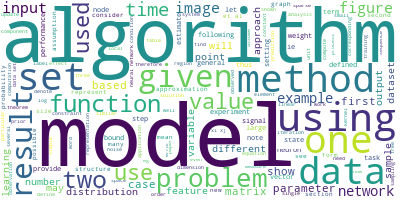

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['understanding', 'brain', 'connectivity', 'patterns', 'motor', 'imagery', 'brain', 'computer', 'interfacing', 'moritz', 'grosse', 'wentrup', 'max', 'planck', 'institute', 'biological', 'cybernetics', 'spemannstr', 'tubingen', 'germany', 'moritzgw', 'ieeeorg', 'abstract', 'eeg', 'connectivity', 'measures', 'could', 'provide', 'new', 'type']


In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 3), (7, 3), (8, 1), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 6)]


In [9]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"model" + 0.005*"data" + 0.005*"learning" + 0.005*"using" + '
  '0.004*"algorithm" + 0.004*"given" + 0.004*"set" + 0.004*"time" + '
  '0.003*"two" + 0.003*"used"'),
 (1,
  '0.006*"matrix" + 0.006*"data" + 0.006*"model" + 0.005*"learning" + '
  '0.005*"set" + 0.005*"algorithm" + 0.004*"figure" + 0.004*"results" + '
  '0.004*"using" + 0.003*"one"'),
 (2,
  '0.007*"data" + 0.006*"model" + 0.005*"xi" + 0.005*"algorithm" + 0.005*"set" '
  '+ 0.004*"learning" + 0.004*"using" + 0.004*"function" + 0.004*"one" + '
  '0.003*"also"'),
 (3,
  '0.007*"model" + 0.006*"data" + 0.005*"set" + 0.004*"one" + 0.004*"time" + '
  '0.004*"function" + 0.004*"learning" + 0.004*"number" + 0.003*"two" + '
  '0.003*"matrix"'),
 (4,
  '0.007*"data" + 0.007*"algorithm" + 0.005*"set" + 0.005*"model" + '
  '0.005*"learning" + 0.005*"using" + 0.004*"function" + 0.004*"matrix" + '
  '0.004*"time" + 0.003*"figure"'),
 (5,
  '0.006*"model" + 0.006*"algorithm" + 0.005*"set" + 0.004*"data" + '
  '0.004*"time"

In [14]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 2:
  LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
  with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

FileNotFoundError: ignored